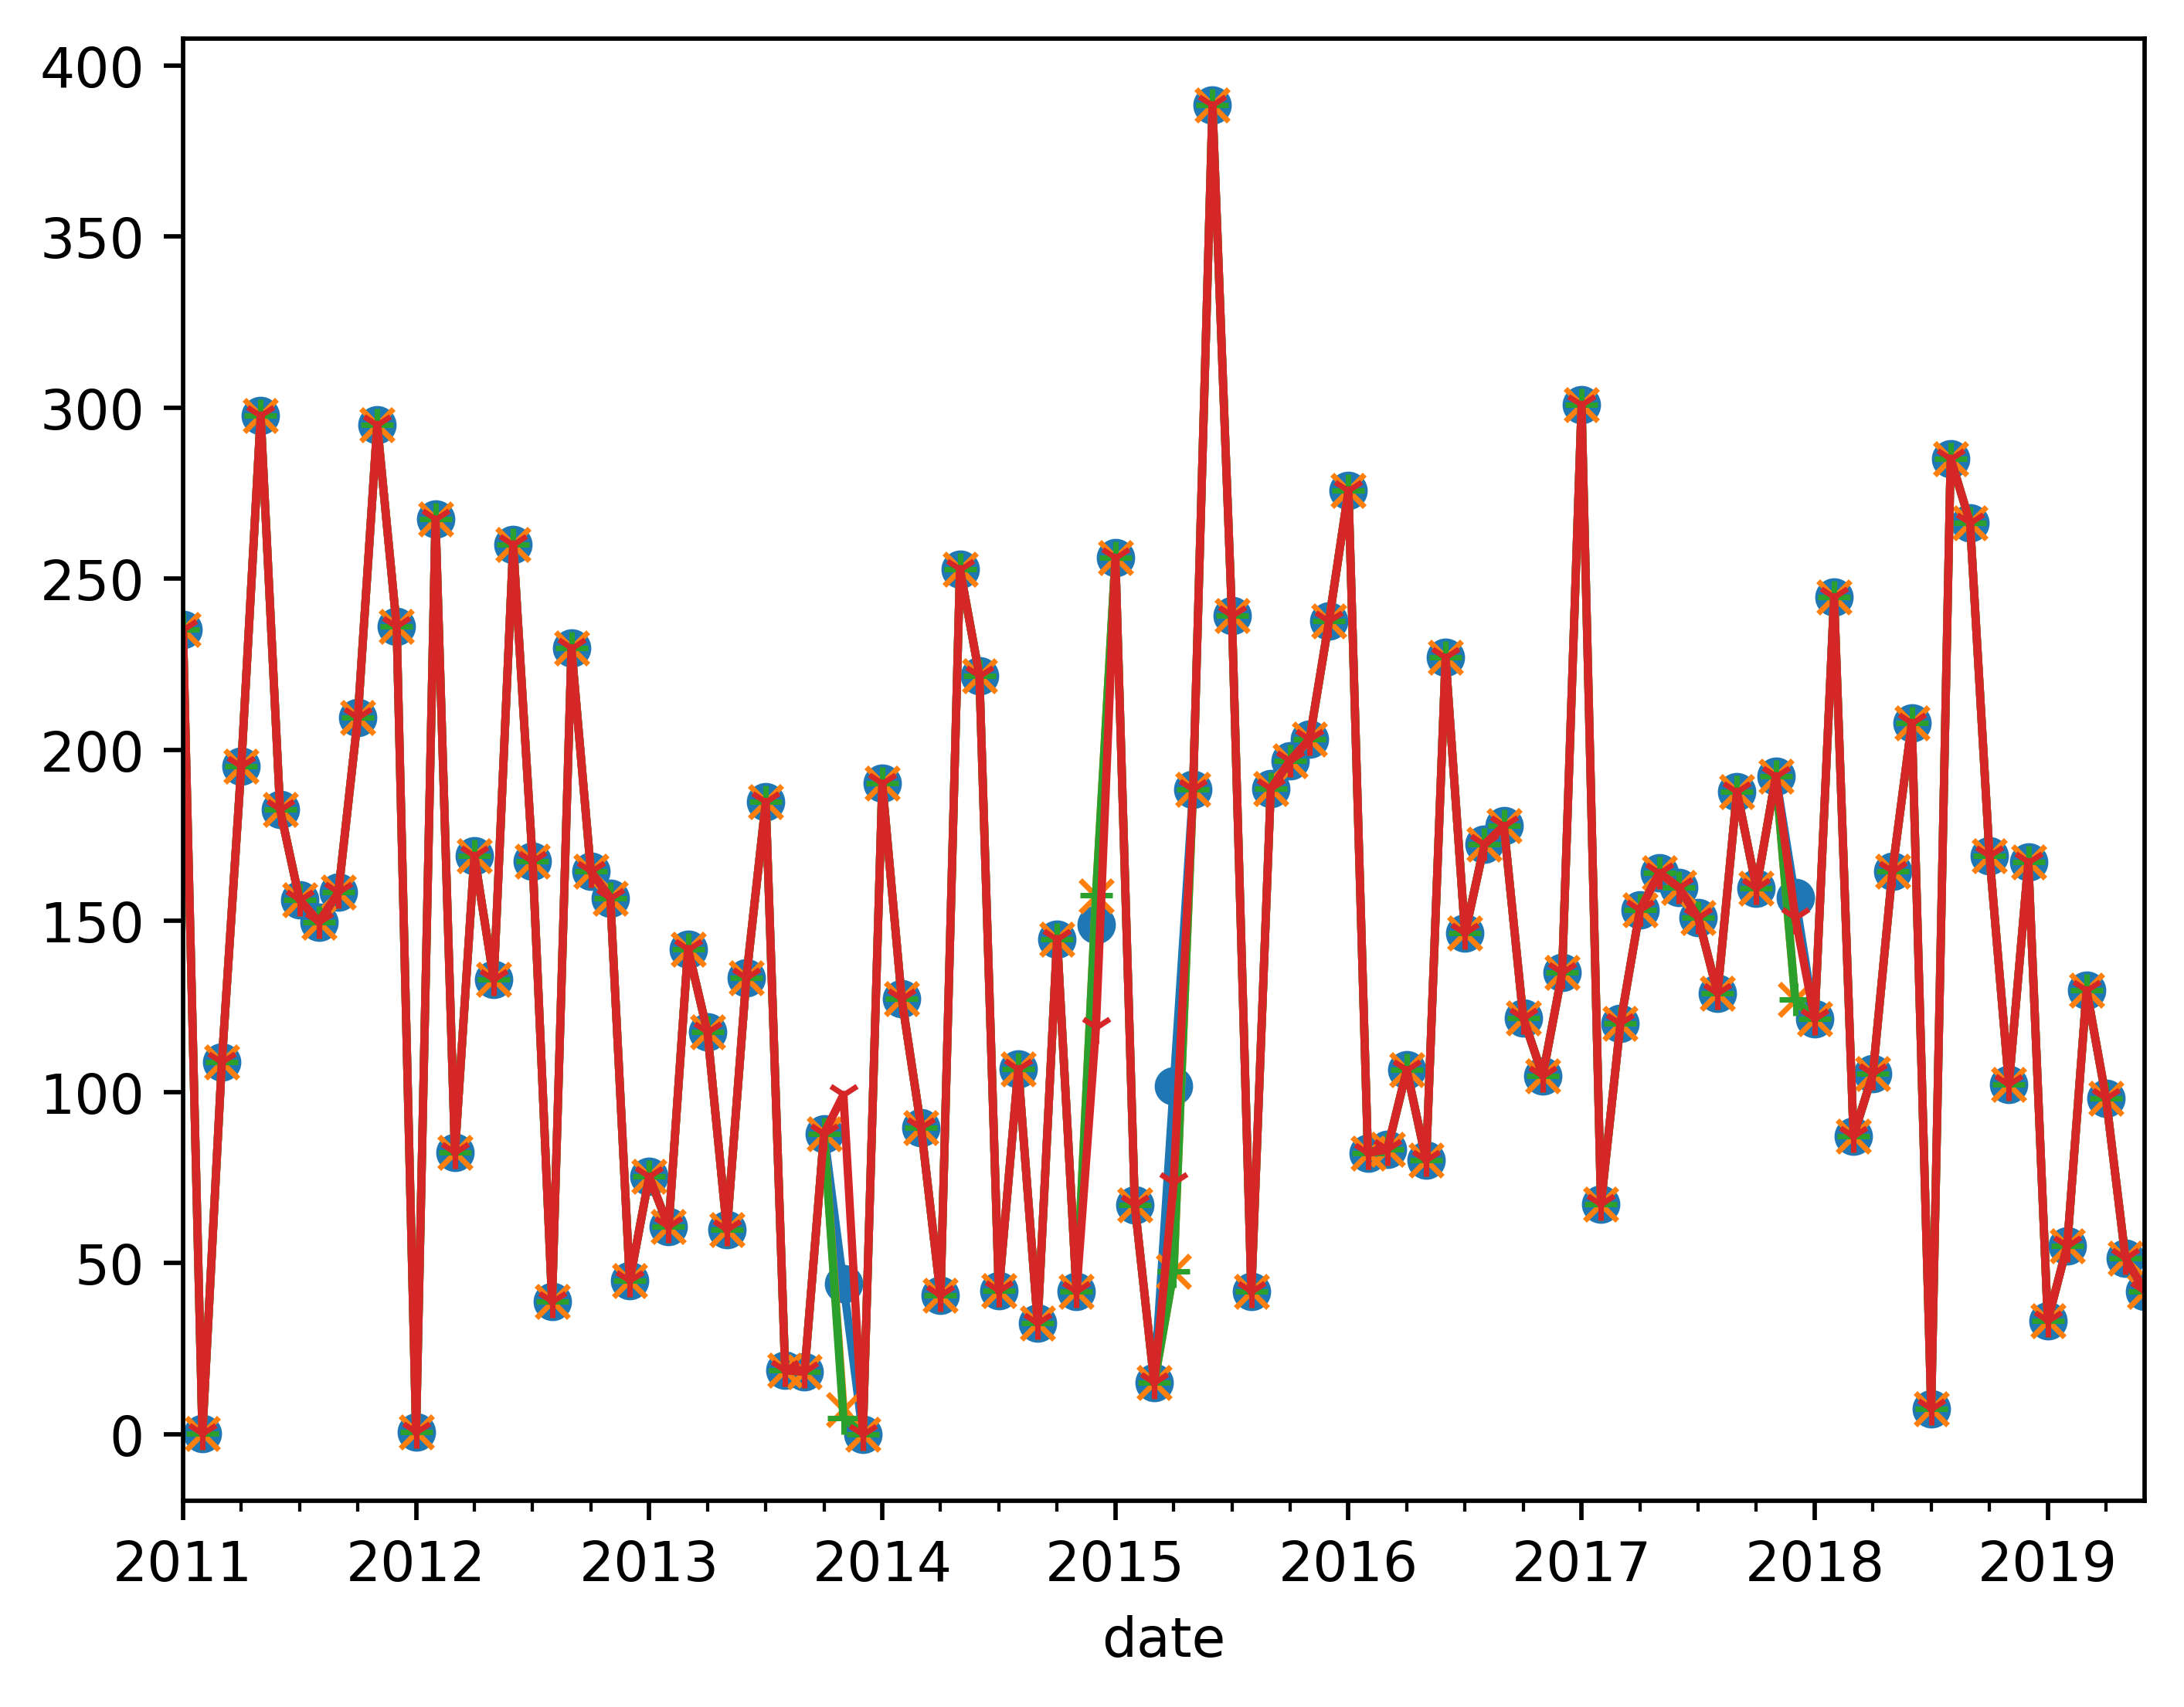

In [22]:
import numpy as np 
import pandas as pd
import warnings
from matplotlib import pyplot as plt 
warnings.filterwarnings("ignore")
plt.figure(dpi=512)
def my_plot(index,data,marker='o'):
    data.index  = index
    data.plot(marker=marker)

file_path = './source_data/A2.xlsx'
data = pd.read_excel(file_path)
data.columns = ['date1','id1','id2','sales','values']
data['date']=pd.to_datetime(data['date1'],format="%Y%m")
data = data[:-10]
data_linear = data['sales'].interpolate()
my_plot(data['date'],data_linear)
poly_data = data['sales'].interpolate(method='polynomial',order=3)
my_plot(data['date'],poly_data,'x')

spline_data = data['sales'].interpolate(method='spline',order=3)

my_plot(data['date'],spline_data,'+')

human_data = pd.read_excel('./source_data/A2backup.xlsx')
human_data.columns= ['date1','id1','id2','sales','values']

my_plot(data['date'],human_data[:-10]['sales'],'1')



0.17177708953338133
722.5129563814684
20.342423844204866


<AxesSubplot:>

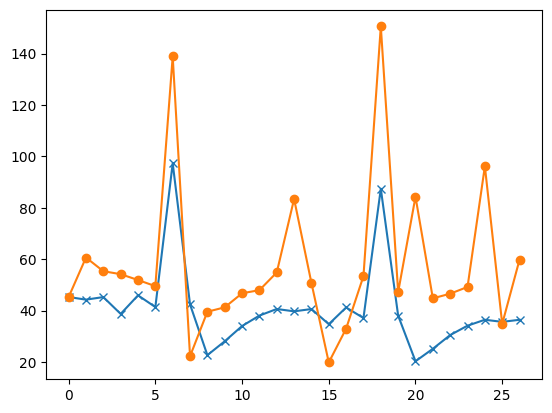

In [116]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima



file_path = './source_data/A1backup.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data = raw_data[raw_data['sales']>=0]
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)


def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]

def scale(train,test):
    # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
    scaler=MinMaxScaler(feature_range=(-1,1))
    # 使用数据来训练缩放器
    scaler=scaler.fit(train)
    # 使用缩放器来将训练集和测试集进行缩放
    train_scaled=scaler.transform(train)
    test_scaled=scaler.transform(test)
    return scaler,train_scaled,test_scaled

train_num = 90
scaler, train_data,test_data = scale(diff_data[:train_num],diff_data[train_num:])

train_data = pd.DataFrame(train_data)
train_data.index = data.index[:train_num]
train_data.columns =['y']
test_data = pd.DataFrame(test_data)
test_data.index = data.index[train_num:-1]
test_data.columns =['y']


model = auto_arima(train_data[35:], seasonal=True, m=12)
test_predict = model.predict(test_data.shape[0])

test_predict = pd.DataFrame(test_predict)
test_predict.index = test_data.index
test_predict = scaler.inverse_transform(test_predict).reshape(-1)

test_data = scaler.inverse_transform(test_data).reshape(-1)
train_data = scaler.inverse_transform(train_data)
# test_predict.plot(marker='x')
# test_data['y'].plot(linestyle='--',marker='o')

def inverse_difference(start,data):
    l =  [start]
    s = start
    for i in data:
        s+=i
        l.append(s)        
    return pd.DataFrame(l)

inverse_predict =  inverse_difference(train_data.sum()+data['sales'][0],test_predict)
inverse_predict = inverse_predict.apply(np.expm1)
# inverse_predict

inverse_test = inverse_difference(train_data.sum()+data['sales'][0],test_data)
inverse_test = inverse_test.apply(np.expm1)

print(r2_score(inverse_test[0],inverse_predict[0]))
print(mean_squared_error(inverse_test[0],inverse_predict[0]))
print(mean_absolute_error(inverse_test[0],inverse_predict[0]))

inverse_predict[0].plot(marker='x')
inverse_test[0].plot(marker='o')

In [119]:
r2s = []
mses =[]
maes = []
def boy_test(start_pos):
    import matplotlib.pyplot as plt 
    import pandas as pd 
    import numpy as np 
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from itertools import product
    from tqdm import tqdm_notebook
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    from sklearn.preprocessing import MinMaxScaler
    from pmdarima import auto_arima



    file_path = './source_data/A1backup.xlsx'
    raw_data = pd.read_excel(file_path)
    raw_data.columns = ['date1','id1','id2','sales','values']
    raw_data = raw_data[raw_data['sales']>=0]
    raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
    data = raw_data[['date','sales']]
    data['sales'] = data['sales'].apply(np.log1p)
    data.set_index('date', inplace=True)


    def difference(data_set,interval=1):
        diff=list()
        for i in range(interval,len(data_set)):
            value=data_set[i]-data_set[i-interval]
            diff.append(value)
        return pd.Series(diff)

    diff_data = difference(data['sales'].values,1)
    diff_data = pd.DataFrame(diff_data)
    diff_data.index = data.index[1:]

    def scale(train,test):
        # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
        scaler=MinMaxScaler(feature_range=(-1,1))
        # 使用数据来训练缩放器
        scaler=scaler.fit(train)
        # 使用缩放器来将训练集和测试集进行缩放
        train_scaled=scaler.transform(train)
        test_scaled=scaler.transform(test)
        return scaler,train_scaled,test_scaled

    train_num = 90
    scaler, train_data,test_data = scale(diff_data[:train_num],diff_data[train_num:])

    train_data = pd.DataFrame(train_data)
    train_data.index = data.index[:train_num]
    train_data.columns =['y']
    test_data = pd.DataFrame(test_data)
    test_data.index = data.index[train_num:-1]
    test_data.columns =['y']


    model = auto_arima(train_data[start_pos:], seasonal=True, m=12,seasonal_test='ch')
    test_predict = model.predict(test_data.shape[0])

    test_predict = pd.DataFrame(test_predict)
    test_predict.index = test_data.index
    test_predict = scaler.inverse_transform(test_predict).reshape(-1)

    test_data = scaler.inverse_transform(test_data).reshape(-1)
    train_data = scaler.inverse_transform(train_data)
    # test_predict.plot(marker='x')
    # test_data['y'].plot(linestyle='--',marker='o')

    def inverse_difference(start,data):
        l =  [start]
        s = start
        for i in data:
            s+=i
            l.append(s)        
        return pd.DataFrame(l)

    inverse_predict =  inverse_difference(train_data.sum()+data['sales'][0],test_predict)
    inverse_predict = inverse_predict.apply(np.expm1)
    # inverse_predict

    inverse_test = inverse_difference(train_data.sum()+data['sales'][0],test_data)
    inverse_test = inverse_test.apply(np.expm1)

    # print(r2_score(inverse_test[0],inverse_predict[0]))
    # print(mean_squared_error(inverse_test[0],inverse_predict[0]))
    # print(mean_absolute_error(inverse_test[0],inverse_predict[0]))

    # inverse_predict[0].plot(marker='x')
    # inverse_test[0].plot(marker='o')
    return (r2_score(inverse_test[0],inverse_predict[0])),(mean_squared_error(inverse_test[0],inverse_predict[0])),(mean_absolute_error(inverse_test[0],inverse_predict[0]))

for i in range(40,70):
    print(i)
    r2,mse,mae = boy_test(i)
    r2s.append(r2)
    mses.append(mse)
    maes.append(mae)
print(r2s)
print(mses)
print(maes)

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]] [875.5797352748485, 884.9001681893941, 883.5323638731105, 884.9902007316858, 893.335422328752, 904.3785519435362, 924.3829472443281, 940.8281097630562, 1012.4993496663121, 964.717584553725, 910.4337609167882, 988.8624420913332, 990.193876205468, 897.3387612824723, 881.1971294802663, 895.7885571646982, 897.8345677170983, 981.940874332277, 855.8548090737664, 890.2836093447755, 840.2126178802541, 852.5235367362261, 825.0107422755818, 786.4286321424829, 1234.6647513437983, 667.9442568236947, 776.10402844004, 706.6762478581697, 733.4008782128733, 638.4139980091531] [20.86378549881829, 21.009364957554627, 20.92713171938924, 20.92489014543096, 21.013477664087464, 21.173675959463097, 21.42870716700

In [121]:
b = [875.5797352748485, 884.9001681893941, 883.5323638731105, 884.9902007316858, 893.335422328752, 904.3785519435362, 924.3829472443281, 940.8281097630562, 1012.4993496663121, 964.717584553725, 910.4337609167882, 988.8624420913332, 990.193876205468, 897.3387612824723, 881.1971294802663, 895.7885571646982, 897.8345677170983, 981.940874332277, 855.8548090737664, 890.2836093447755, 840.2126178802541, 852.5235367362261, 825.0107422755818, 786.4286321424829, 1234.6647513437983, 667.9442568236947, 776.10402844004, 706.6762478581697, 733.4008782128733, 638.4139980091531] 
c = [20.86378549881829, 21.009364957554627, 20.92713171938924, 20.92489014543096, 21.013477664087464, 21.173675959463097, 21.428707167004692, 21.65798317853354, 22.85593437133858, 21.770120539647568, 21.09075257847823, 22.410144450218915, 22.400832863080854, 20.816399550984716, 20.52334346569253, 21.107693018011187, 21.23096081402944, 21.447688388379692, 20.256060573768522, 21.063379666514898, 19.960403536658916, 19.774908680025696, 19.13019212432337, 18.843323304116737, 22.788678806500617, 17.558475003031585, 18.087117352852555, 17.360371502773663, 17.084058283820656, 16.25185040503591]


30

0.6374316419393228
282.4549441504505
12.676025519631427


<AxesSubplot:>

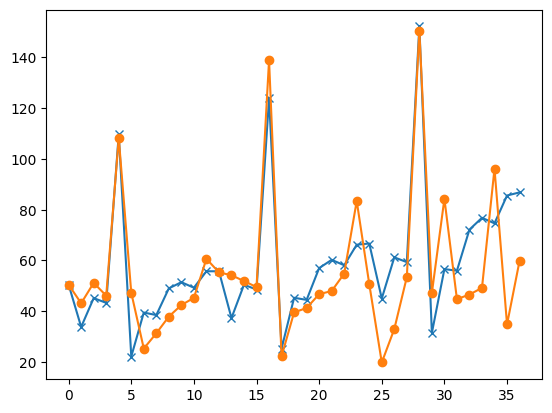

In [155]:

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima



file_path = './source_data/A1backup.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
raw_data = raw_data[raw_data['id1']>=0]
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)
data = data.interpolate(method='polynomial',order=3)



def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]

def scale(train,test):
    # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
    scaler=MinMaxScaler(feature_range=(-1,1))
    # 使用数据来训练缩放器
    scaler=scaler.fit(train)
    # 使用缩放器来将训练集和测试集进行缩放
    train_scaled=scaler.transform(train)
    test_scaled=scaler.transform(test)
    return scaler,train_scaled,test_scaled

train_num = 80
# scaler, train_data,test_data = scale(diff_data[:train_num],diff_data[train_num:])
train_data,test_data = diff_data[:train_num],diff_data[train_num:]

train_data = pd.DataFrame(train_data)
train_data.index = data.index[:train_num]
train_data.columns =['y']
test_data = pd.DataFrame(test_data)
test_data.index = data.index[train_num:-1]
test_data.columns =['y']




model = auto_arima(train_data[44:], seasonal=True, m=12)
test_predict = model.predict(test_data.shape[0])


test_predict.index = test_data.index
# test_predict = scaler.inverse_transform(test_predict).reshape(-1)

# test_data = scaler.inverse_transform(test_data).reshape(-1)
# train_data = scaler.inverse_transform(train_data)
# test_predict.plot(marker='x')



def inverse_difference(start,data):
    l =  [start]
    s = start
    for i in data:
        s+=i
        l.append(s)        
    return pd.DataFrame(l)

inverse_predict =  inverse_difference(train_data.y.sum()+data['sales'][0],test_predict.values)

inverse_predict = inverse_predict.apply(np.expm1)
# # # inverse_predict



inverse_test = inverse_difference(train_data.y.sum()+data['sales'][0],test_data.y)
inverse_test = inverse_test.apply(np.expm1)



print(r2_score(inverse_test[0],inverse_predict[0]))
print(mean_squared_error(inverse_test[0],inverse_predict[0]))
print(mean_absolute_error(inverse_test[0],inverse_predict[0]))

inverse_predict[0].plot(marker='x')
inverse_test[0].plot(marker='o')

In [147]:
train_data.sum()[0]

array([3.90293497])

In [ ]:
inverse_test

,0
0,7.456
1,285.172
2,266.396
3,169.120
4,102.324
5,167.248
6,33.224
7,55.100
8,129.776
9,98.208


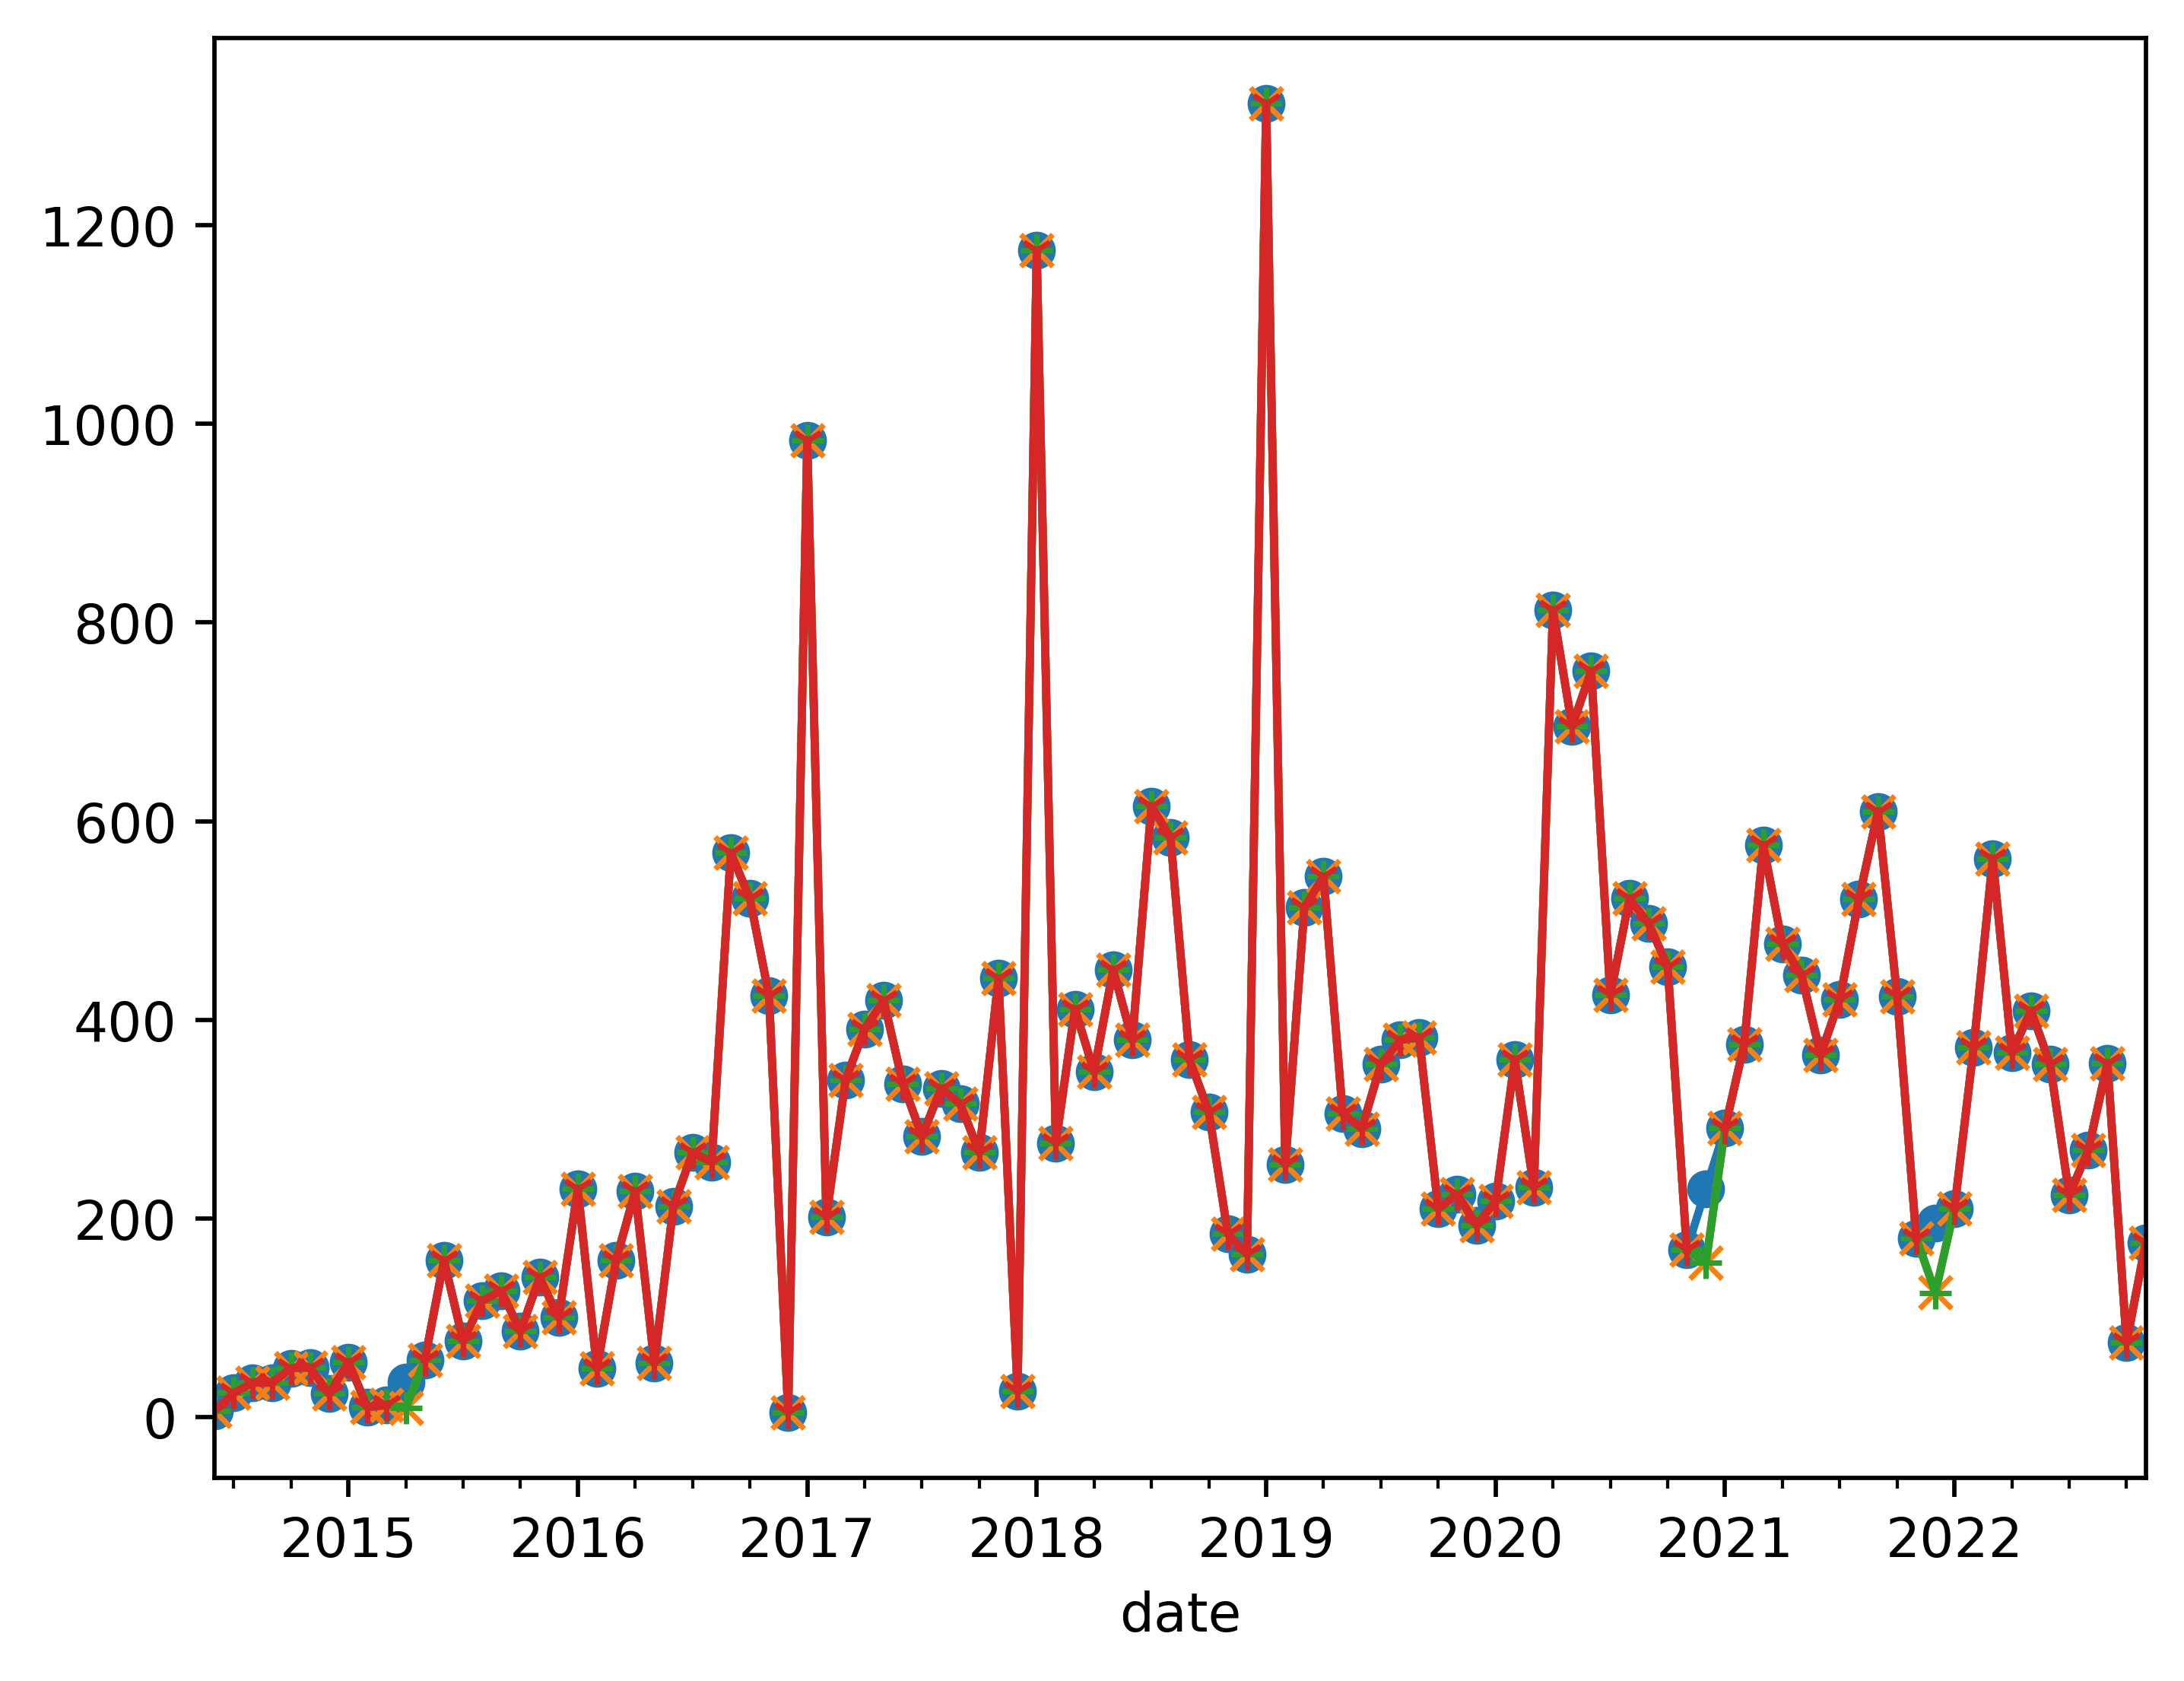

In [71]:
import numpy as np 
import pandas as pd
import warnings
from matplotlib import pyplot as plt 
warnings.filterwarnings("ignore")
plt.figure(dpi=512)
def my_plot(index,data,marker='o'):
    data.index  = index
    data.plot(marker=marker)

file_path = './source_data/A3.xlsx'
data = pd.read_excel(file_path)
data.columns = ['date1','id1','id2','sales','values']
data['date']=pd.to_datetime(data['date1'],format="%Y%m")
data = data[data['id1']>=0]

data_linear = data['sales'].interpolate()
my_plot(data['date'],data_linear)
poly_data = data['sales'].interpolate(method='polynomial',order=3)
my_plot(data['date'],poly_data,'x')

spline_data = data['sales'].interpolate(method='spline',order=3)

my_plot(data['date'],spline_data,'+')

human_data = pd.read_excel('./source_data/A3backup.xlsx')
human_data.columns= ['date1','id1','id2','sales','values']
human_data = human_data[human_data['id1']>=0]

my_plot(data['date'],human_data['sales'],'1')



<AxesSubplot:xlabel='date'>

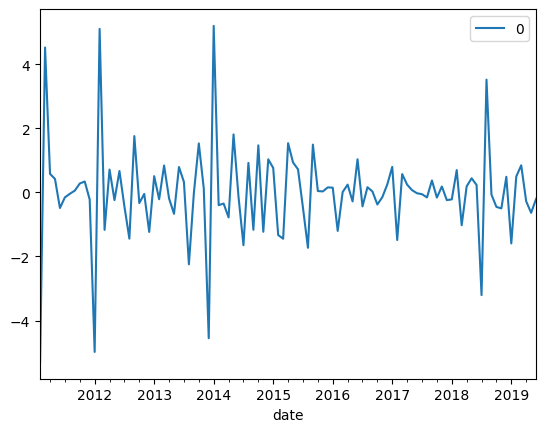

In [57]:
diff_data.plot()